In [47]:
# Importing necessary libraries
import pandas as pd

# Load the dataset
file_path = '/content/medical_cost.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows of the dataset to understand its structure
df.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [48]:
# Check for data types and null values
print("Dataset Information:\n")
print(df.info())

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB
None


In [49]:
# Check for missing values in each column
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

Id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [50]:
# Display basic statistical summary of numerical columns
print("\nStatistical Summary:\n")
print(df.describe())


Statistical Summary:

                Id          age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000
mean    669.500000    39.207025    30.663397     1.094918  13270.422265
std     386.391641    14.049960     6.098187     1.205493  12110.011237
min       1.000000    18.000000    15.960000     0.000000   1121.873900
25%     335.250000    27.000000    26.296250     0.000000   4740.287150
50%     669.500000    39.000000    30.400000     1.000000   9382.033000
75%    1003.750000    51.000000    34.693750     2.000000  16639.912515
max    1338.000000    64.000000    53.130000     5.000000  63770.428010


In [51]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [52]:
# Drop the 'Id' column as it's not needed for analysis
df.drop(columns=['Id'], inplace=True)

In [53]:
# Display the first few rows again to confirm changes
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


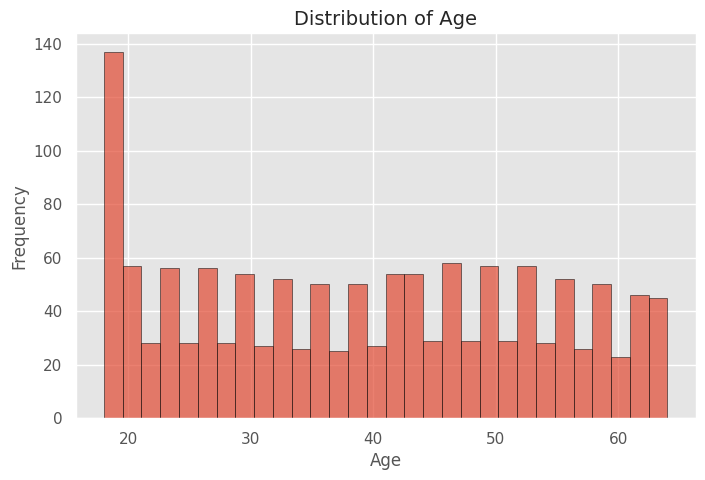

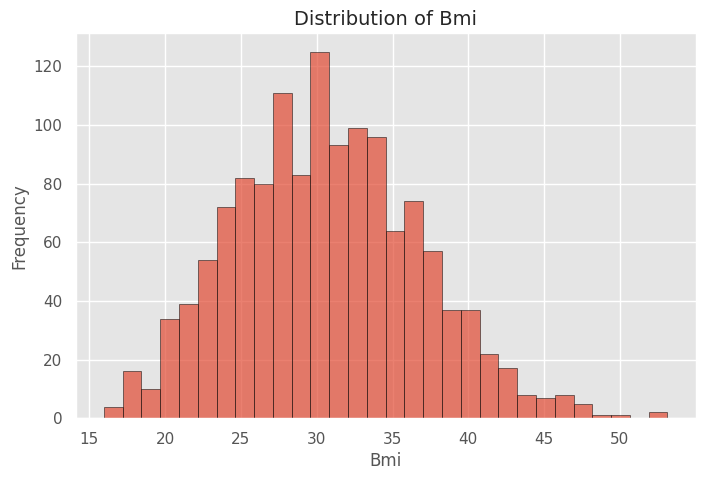

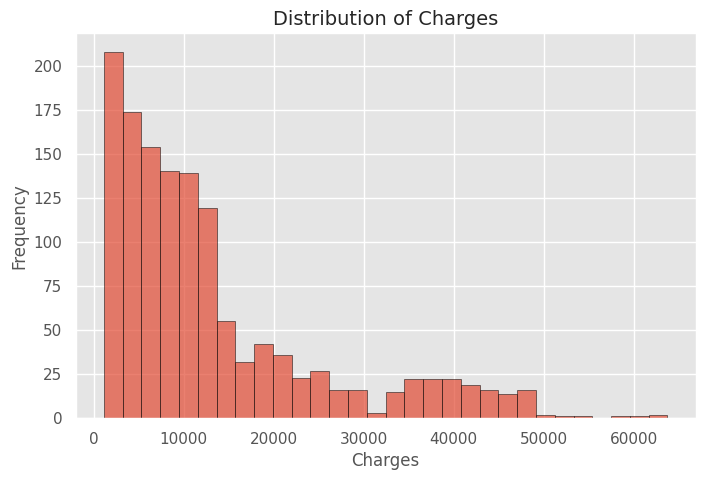

In [55]:
# Importing visualization libraries
import matplotlib.pyplot as plt

# Use default matplotlib style
plt.style.use('ggplot')

# Plotting histograms for numerical columns
numerical_cols = ['age', 'bmi', 'charges']

# Creating histograms for each numerical feature
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col.capitalize()}', fontsize=14)
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.show()

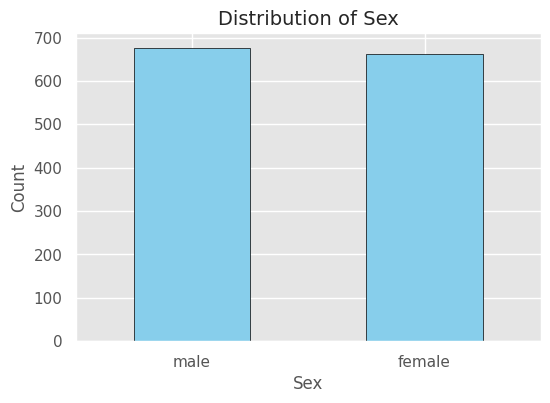

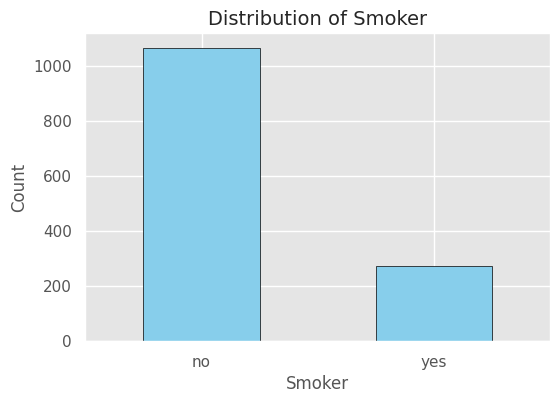

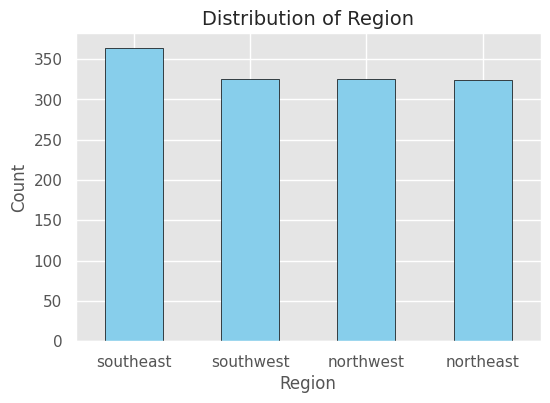

In [57]:
# Plotting bar charts for categorical columns
categorical_cols = ['sex', 'smoker', 'region']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col.capitalize()}', fontsize=14)
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

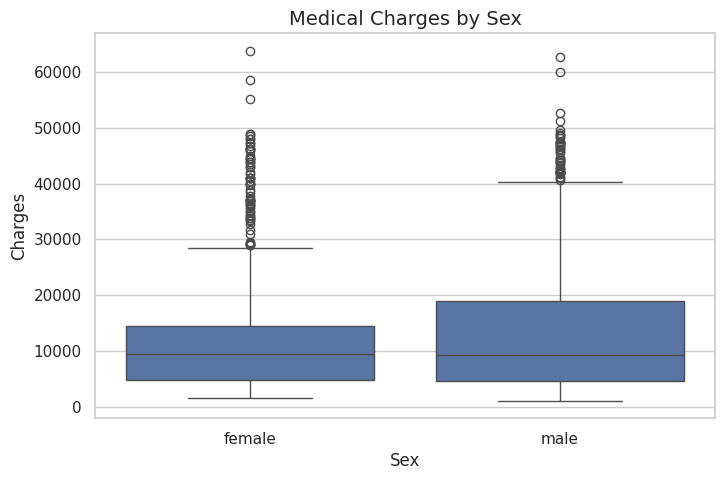

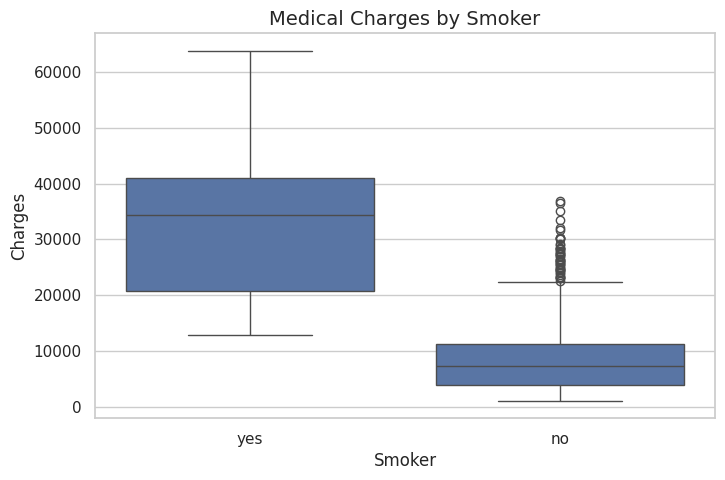

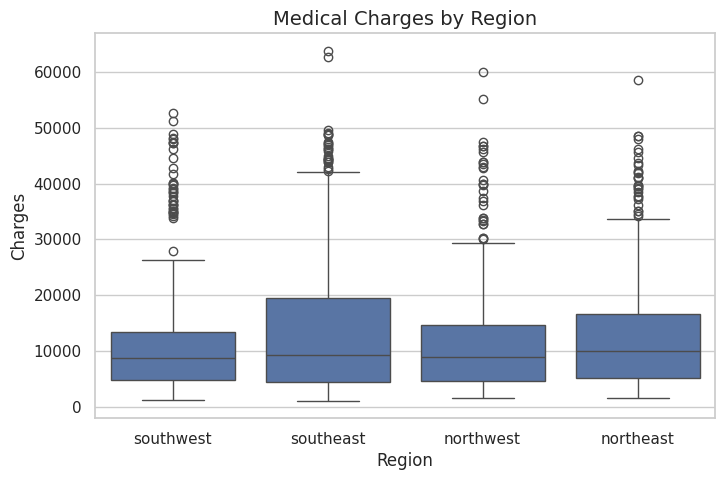

In [58]:
import seaborn as sns

# Setting up plot style
sns.set(style="whitegrid")

# Plotting boxplots to see the relationship between categorical features and charges
categorical_cols = ['sex', 'smoker', 'region']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=col, y='charges', data=df)
    plt.title(f'Medical Charges by {col.capitalize()}', fontsize=14)
    plt.xlabel(col.capitalize())
    plt.ylabel('Charges')
    plt.show()

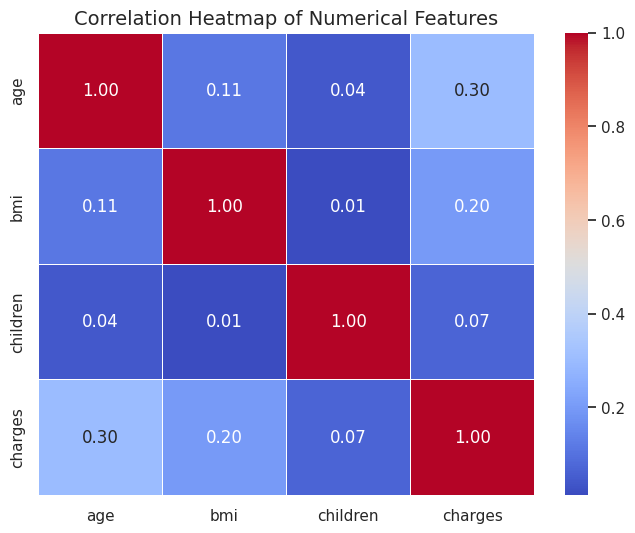

In [60]:
# Selecting only the numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix to see relationships between numerical features
plt.figure(figsize=(8, 6))
correlation = numerical_df.corr()

# Plotting the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()

In [61]:
# Encoding 'sex' and 'smoker' columns to binary values
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# One-hot encoding for 'region' (since it has more than 2 categories)
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Display the first few rows after encoding
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


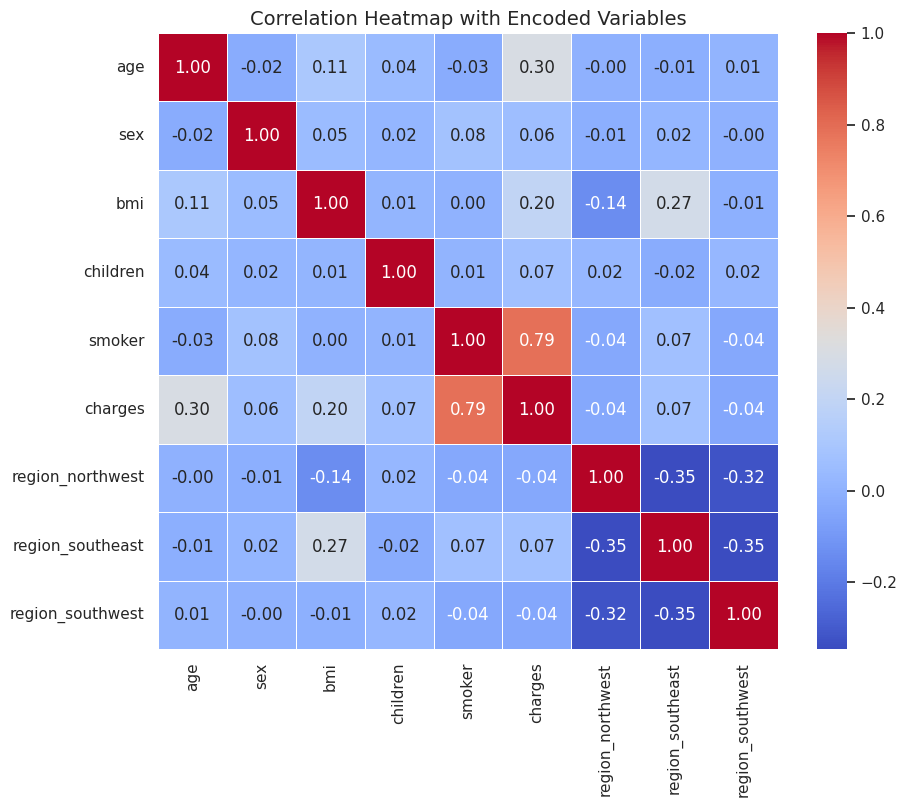

In [62]:
# Correlation matrix with encoded categorical variables
plt.figure(figsize=(10, 8))
correlation = df.corr()

# Plotting the updated heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap with Encoded Variables', fontsize=14)
plt.show()

In [64]:
# Save the cleaned dataset to a CSV file
cleaned_file_path = '/content/cleaned_medical_cost.csv'
df.to_csv(cleaned_file_path, index=False)

# Confirming the dataset is saved
print(f"Cleaned dataset saved to: {cleaned_file_path}")

Cleaned dataset saved to: /content/cleaned_medical_cost.csv
